**<center>* project: Fake Bill Classification *</center>**

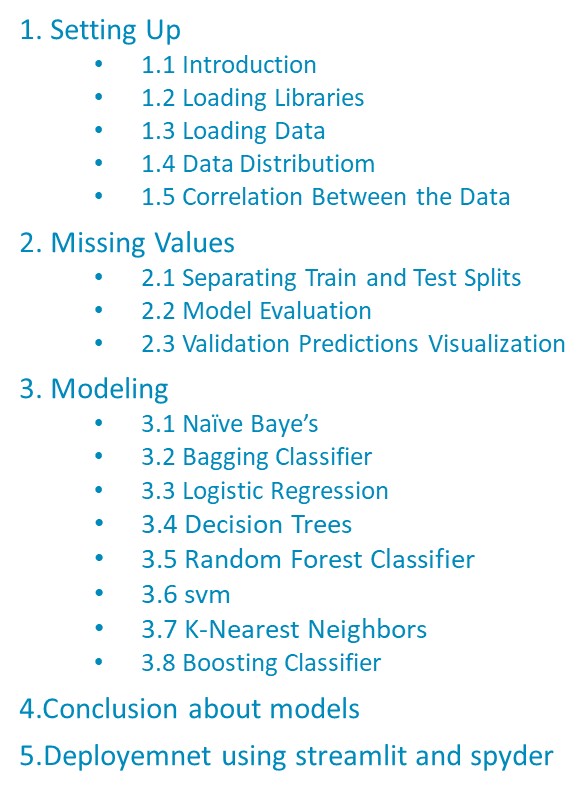

1) **Performing EDA and filling the missiling values in the dataset**

**Predicting the missing values with a linear regression.**

  The dataset includes 1500 rows and 7 columns:

-  is_genuine: boolean

-  diagonal: float

-  height_left: float

-  height_right: float

-  margin_low: float

-  margin_upper: float

-  length: float


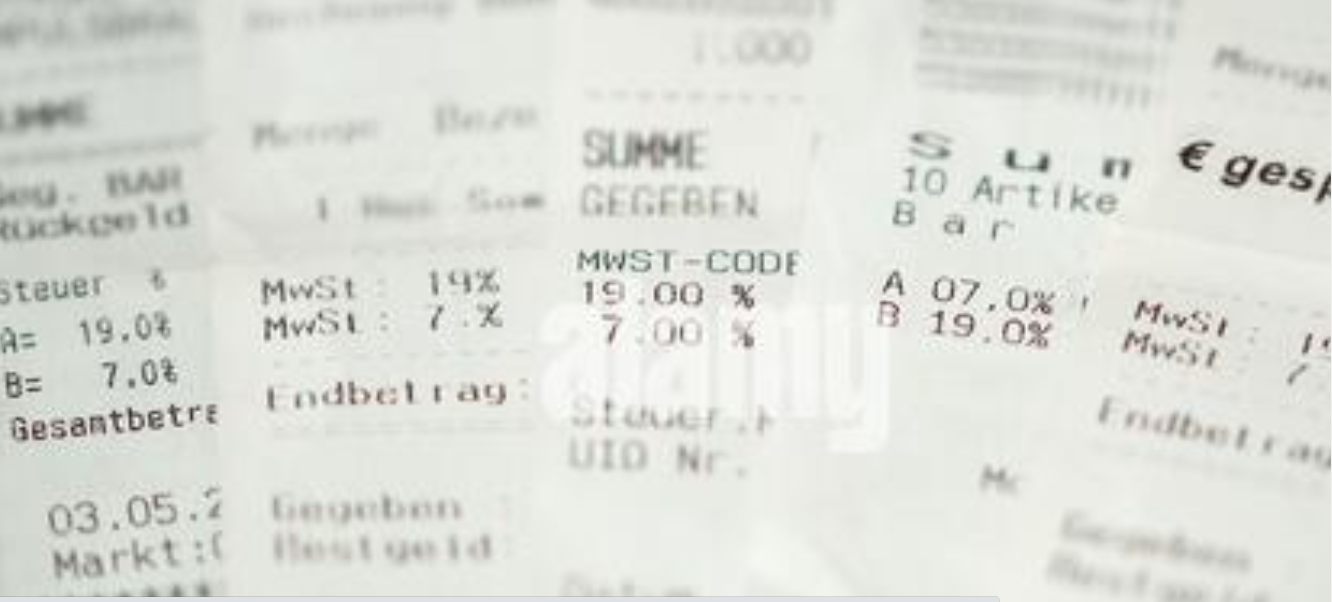

In [ ]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#loading data
from google.colab import files
uploaded=files.upload()

Saving fake_bills.csv to fake_bills.csv


In [ ]:
fakebills=pd.read_csv("fake_bills.csv",sep = ';')
fakebills

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


## BASIC & EDA

In [ ]:
fakebills.shape

(1500, 7)

There are 1500 rows and 7 columns in the given dataset.

In [ ]:
fakebills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


- All featues have the right data type with the data values.

In [ ]:
fakebills.duplicated().value_counts()

False    1500
dtype: int64

-  There are no duplicate records in the given dataset.

In [ ]:
fakebills.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

-  There are 37 null values in the margin_low feature. Rest All doesn't have any null values.

In [ ]:
#describing data with some statistical values
fakebills.describe().T

,count,mean,std,min,25%,50%,75%,max
diagonal,1500.0,171.958440,0.305195,171.04,171.750,171.96,172.17,173.01
height_left,1500.0,104.029533,0.299462,103.14,103.820,104.04,104.23,104.88
height_right,1500.0,103.920307,0.325627,102.82,103.710,103.92,104.15,104.95
margin_low,1463.0,4.485967,0.663813,2.98,4.015,4.31,4.87,6.90
margin_up,1500.0,3.151473,0.231813,2.27,2.990,3.14,3.31,3.91
length,1500.0,112.678500,0.872730,109.49,112.030,112.96,113.34,114.44


In [ ]:
# number of distinct values in each feature
for i, column in enumerate(fakebills.columns, 1):
  print('Distinct values in feature ',fakebills[column].name,' are ',fakebills[column].nunique())

Distinct values in feature  is_genuine  are  2
Distinct values in feature  diagonal  are  159
Distinct values in feature  height_left  are  155
Distinct values in feature  height_right  are  170
Distinct values in feature  margin_low  are  285
Distinct values in feature  margin_up  are  123
Distinct values in feature  length  are  336


In [ ]:
# number of distinct values with how many times its repeated in each feature
for i, column in enumerate(fakebills.columns, 1):
  print("\n ------------------------","\n",fakebills[column].value_counts(),"\n--------------------------")


 ------------------------ 
 True     1000
False     500
Name: is_genuine, dtype: int64 
--------------------------

 ------------------------ 
 171.99    28
171.91    26
171.94    25
171.95    24
172.02    24
          ..
172.60     1
171.28     1
172.54     1
171.25     1
171.16     1
Name: diagonal, Length: 159, dtype: int64 
--------------------------

 ------------------------ 
 103.95    30
104.05    27
104.18    27
103.99    25
104.17    25
          ..
103.36     1
103.30     1
103.46     1
103.41     1
104.85     1
Name: height_left, Length: 155, dtype: int64 
--------------------------

 ------------------------ 
 103.76    28
103.83    24
103.94    24
103.80    24
103.85    23
          ..
103.08     1
103.24     1
103.16     1
103.04     1
104.61     1
Name: height_right, Length: 170, dtype: int64 
--------------------------

 ------------------------ 
 4.08    20
4.10    20
4.18    20
4.17    18
4.12    18
        ..
5.35     1
6.11     1
5.70     1
5.74     1
5.41     1
N

In [ ]:
#plotting the heatmap for correlation
plt.figure(figsize=(12,5))
ax = sns.heatmap(fakebills.corr(), annot=True)
ax.xaxis.tick_top()

-  Among all features, length and is_genuine are highly and positively correlated, Margin_ low and is_genuine are highly and negatively correlated.

## 2) Filling Missing values

In [ ]:
#label encoding to involve each field in finding missing values

fakebills_lab=fakebills.copy()

from sklearn import preprocessing

label_encoder=preprocessing.LabelEncoder()
fakebills_lab['is_genuine']=label_encoder.fit_transform(fakebills_lab['is_genuine'])
fakebills_lab

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,172.06,104.28,104.06,5.17,3.46,112.25


In [ ]:
train = fakebills_lab[fakebills_lab['margin_low'].notna()].copy()
test = fakebills_lab[fakebills_lab['margin_low'].isna()].copy()

train

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,172.06,104.28,104.06,5.17,3.46,112.25


In [ ]:
X_train=train.drop("margin_low",axis=1)
y_train=train.margin_low

X_train

,is_genuine,diagonal,height_left,height_right,margin_up,length
0,1,171.81,104.86,104.95,2.89,112.83
1,1,171.46,103.36,103.66,2.99,113.09
2,1,172.69,104.48,103.50,2.94,113.16
3,1,171.36,103.91,103.94,3.01,113.51
4,1,171.73,104.28,103.46,3.48,112.54
...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,3.09,111.28
1496,0,172.19,104.63,104.44,3.37,110.97
1497,0,171.80,104.01,104.12,3.36,111.95
1498,0,172.06,104.28,104.06,3.46,112.25


In [ ]:
y_train

0       4.52
1       3.77
2       4.40
3       3.62
4       4.04
        ... 
1495    4.42
1496    5.27
1497    5.51
1498    5.17
1499    4.63
Name: margin_low, Length: 1463, dtype: float64

In [ ]:
test

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,1,171.94,103.89,103.45,NaN,3.25,112.79
99,1,171.93,104.07,104.18,NaN,3.14,113.08
151,1,172.07,103.80,104.38,NaN,3.02,112.93
197,1,171.45,103.66,103.80,NaN,3.62,113.27
241,1,171.83,104.14,104.06,NaN,3.02,112.36
251,1,171.80,103.26,102.82,NaN,2.95,113.22
284,1,171.92,103.83,103.76,NaN,3.23,113.29
334,1,171.85,103.70,103.96,NaN,3.00,113.36
410,1,172.56,103.72,103.51,NaN,3.12,112.95
413,1,172.30,103.66,103.50,NaN,3.16,112.95


In [ ]:
X_test=test.drop("margin_low",axis=1)
X_test

,is_genuine,diagonal,height_left,height_right,margin_up,length
72,1,171.94,103.89,103.45,3.25,112.79
99,1,171.93,104.07,104.18,3.14,113.08
151,1,172.07,103.80,104.38,3.02,112.93
197,1,171.45,103.66,103.80,3.62,113.27
241,1,171.83,104.14,104.06,3.02,112.36
251,1,171.80,103.26,102.82,2.95,113.22
284,1,171.92,103.83,103.76,3.23,113.29
334,1,171.85,103.70,103.96,3.00,113.36
410,1,172.56,103.72,103.51,3.12,112.95
413,1,172.30,103.66,103.50,3.16,112.95


In [ ]:
X_train.shape,X_test.shape,y_train.shape

((1463, 6), (37, 6), (1463,))

## Using Linear Regression for filling the missing values

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([4.06495361, 4.11199026, 4.13400328, 3.99357074, 4.1403993 ,
       4.09428392, 4.07412432, 4.12538999, 4.0807278 , 4.07363322,
       4.11897255, 4.18037978, 4.13648423, 4.05106842, 4.17837685,
       4.22555104, 4.11586845, 4.10284101, 4.08184346, 4.09276238,
       4.11250192, 4.15717623, 4.16028787, 4.12193808, 4.12353555,
       4.19842271, 4.10962313, 4.09696025, 4.13384101, 5.25968515,
       5.264817  , 5.28251853, 5.30206887, 5.20035843, 5.1754678 ,
       5.17345045, 5.24675055])

In [ ]:
test['margin_low'] = y_pred
fakebills_nona = pd.concat([train, test])
fakebills_nona=fakebills_nona.reset_index()
fakebills_nona=fakebills_nona.drop('index',axis=1)
fakebills_nona

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.520000,2.89,112.83
1,1,171.46,103.36,103.66,3.770000,2.99,113.09
2,1,172.69,104.48,103.50,4.400000,2.94,113.16
3,1,171.36,103.91,103.94,3.620000,3.01,113.51
4,1,171.73,104.28,103.46,4.040000,3.48,112.54
...,...,...,...,...,...,...,...
1495,0,172.17,104.49,103.76,5.302069,2.93,111.21
1496,0,172.08,104.15,104.17,5.200358,3.40,112.29
1497,0,171.72,104.46,104.12,5.175468,3.61,110.31
1498,0,172.66,104.33,104.41,5.173450,3.56,111.47


In [ ]:
fakebills_nona.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

-  There are no null values in the dataset (after using linear regression to fill in null values).

##Visualizing data points

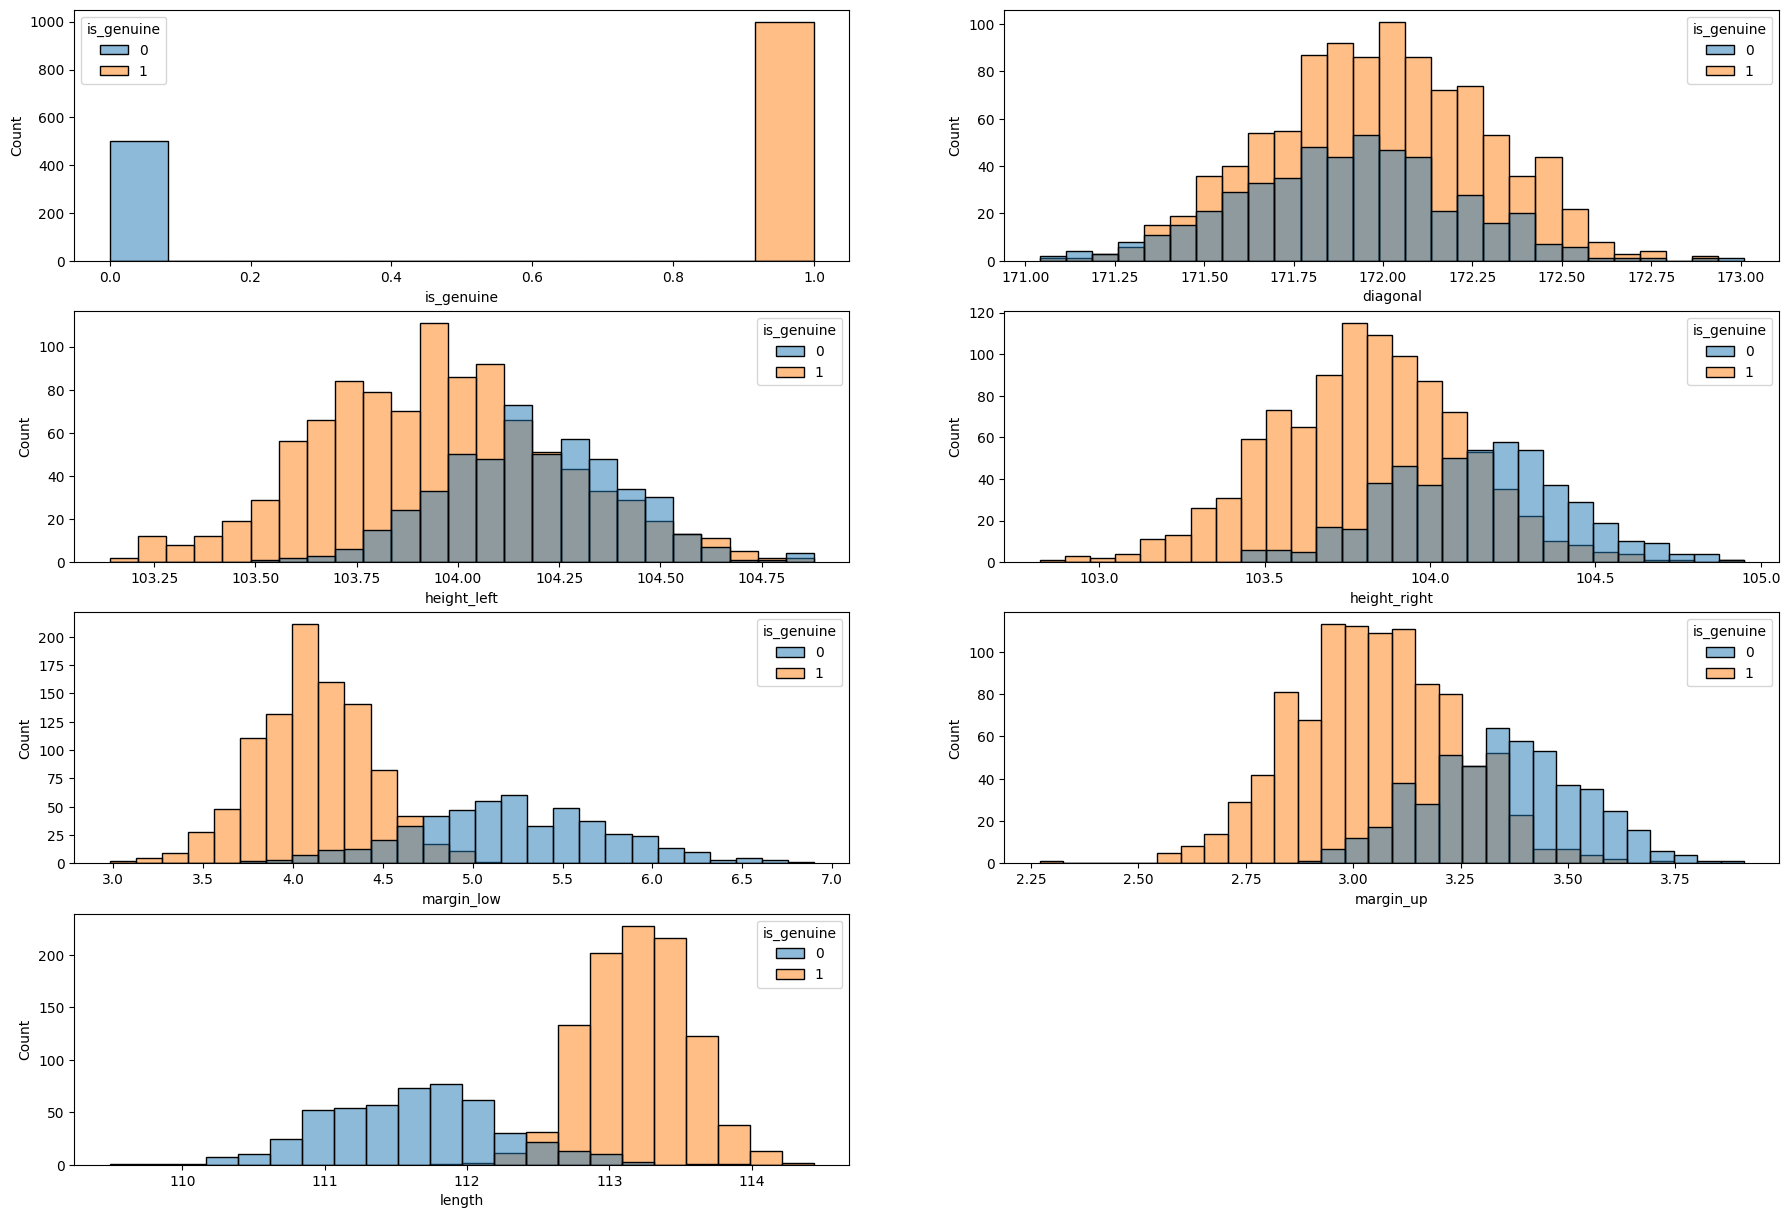

In [ ]:
#plotting histplots to observe datapoints nature
plt.figure(figsize=(22,15))
for i, column in enumerate(fakebills_nona.columns, 1):
    plt.subplot(4,2,i)
    sns.histplot(data=fakebills_nona,x=fakebills_nona[column],hue="is_genuine")

-  When we divide the data using the is_genuine feature, it appears to be normally distributed. 

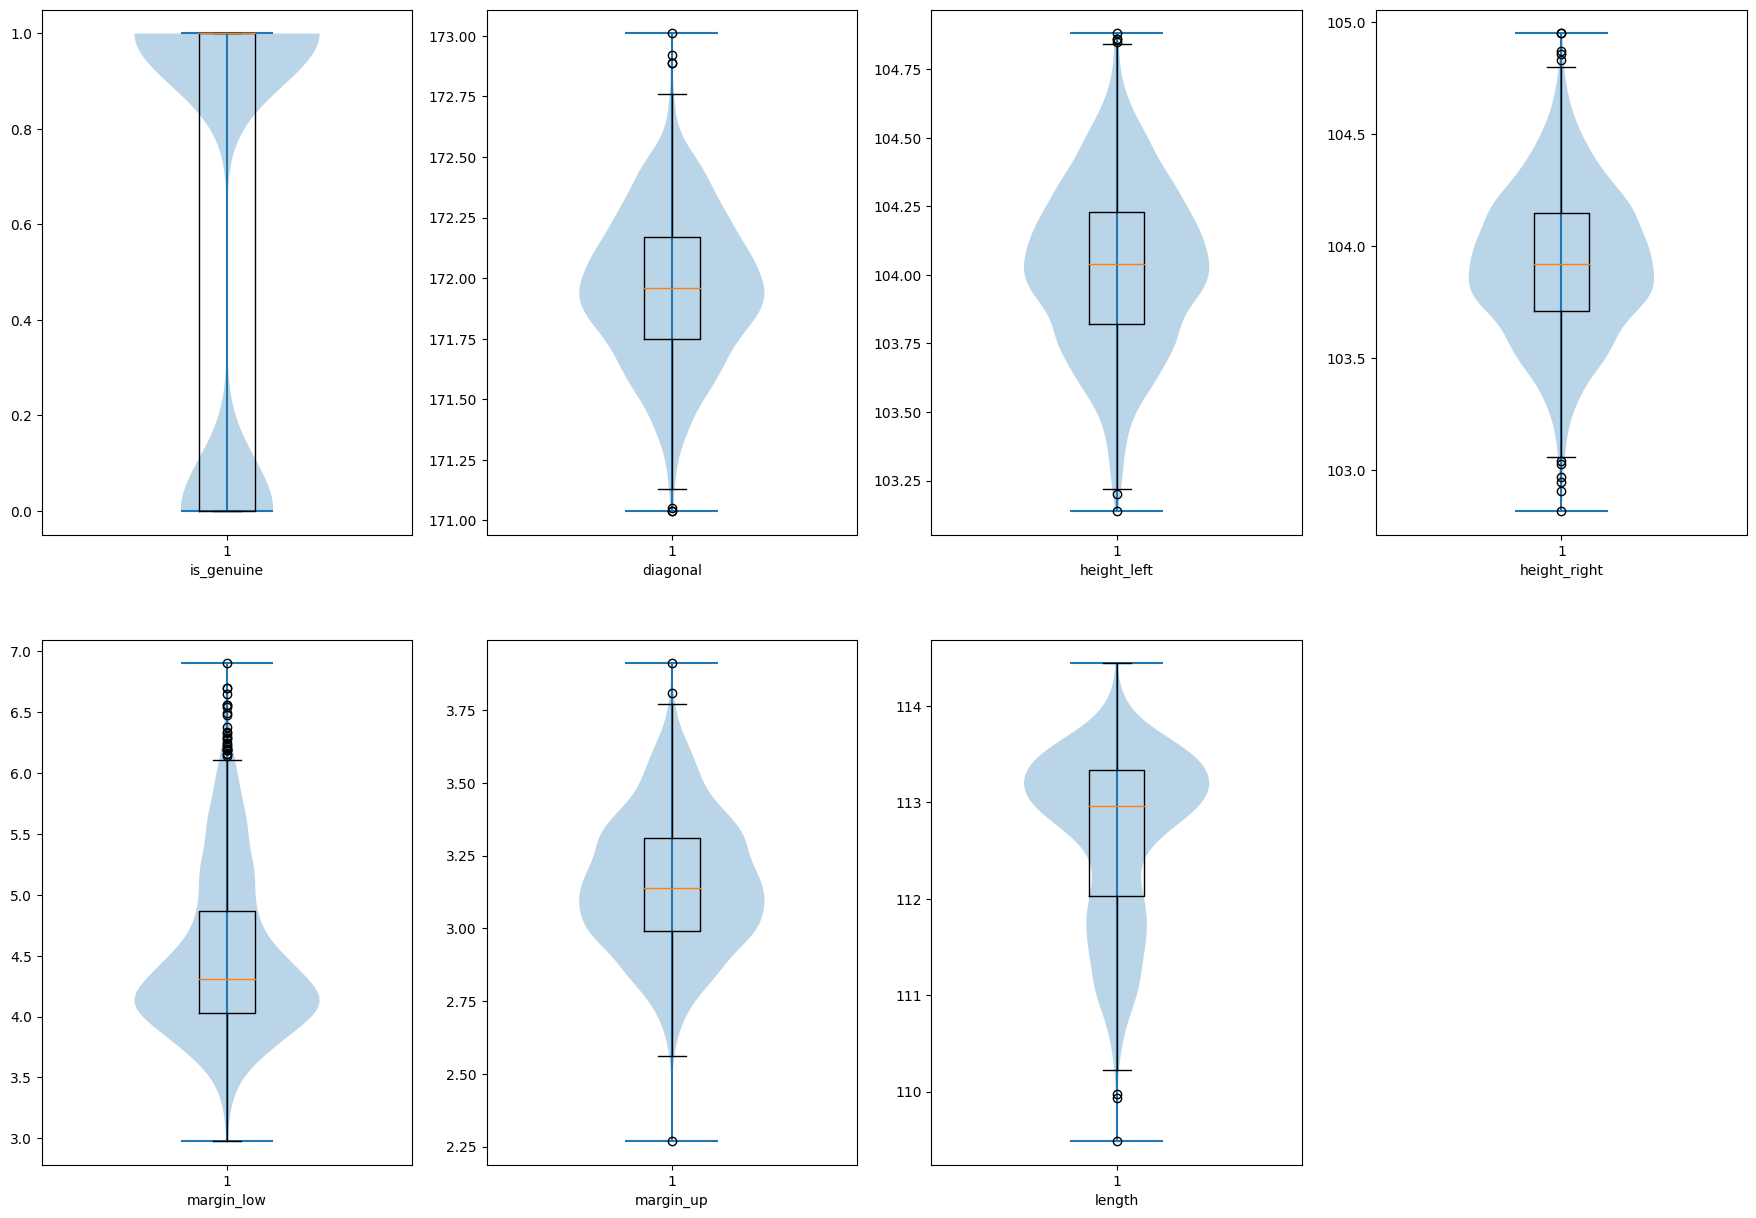

In [ ]:
#plotting boxplots to observe datapoints nature
plt.figure(figsize=(22,15))
for i, column in enumerate(fakebills_nona.columns, 1):
    plt.subplot(2,4,i)
    plt.violinplot(fakebills_nona[column])
    plt.boxplot(fakebills_nona[column])
    plt.xlabel(fakebills_nona[column].name)

-  There are notable outliers in the margin_low feature, and the rest, all having only a few points, are out of the wishker's reach.

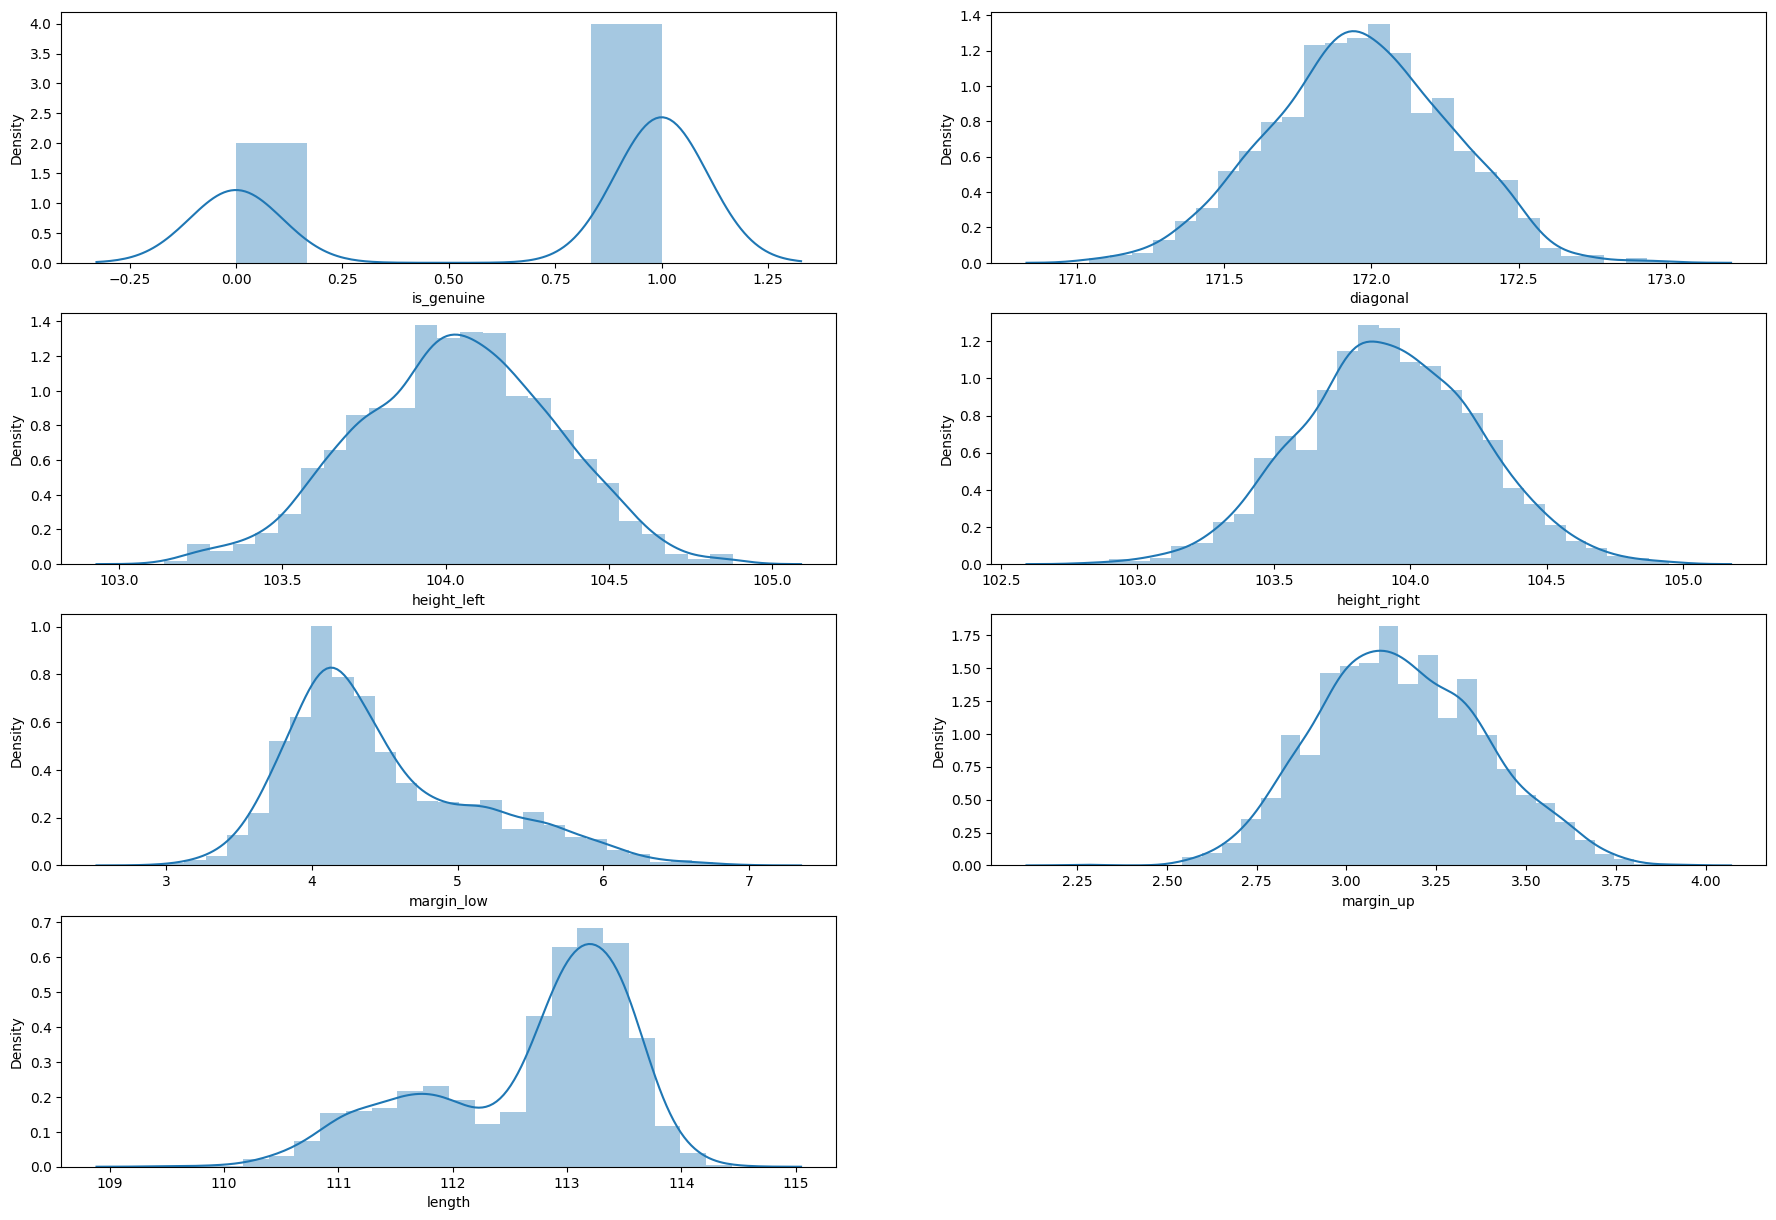

In [ ]:
#plotting histplots to observe datapoints nature
plt.figure(figsize=(22,15))
for i, column in enumerate(fakebills_nona.columns, 1):
    plt.subplot(4,2,i)
    sns.distplot(fakebills_nona[column])

-  length and margin_low are not normally distributed. Rest all are looking distributed normally.

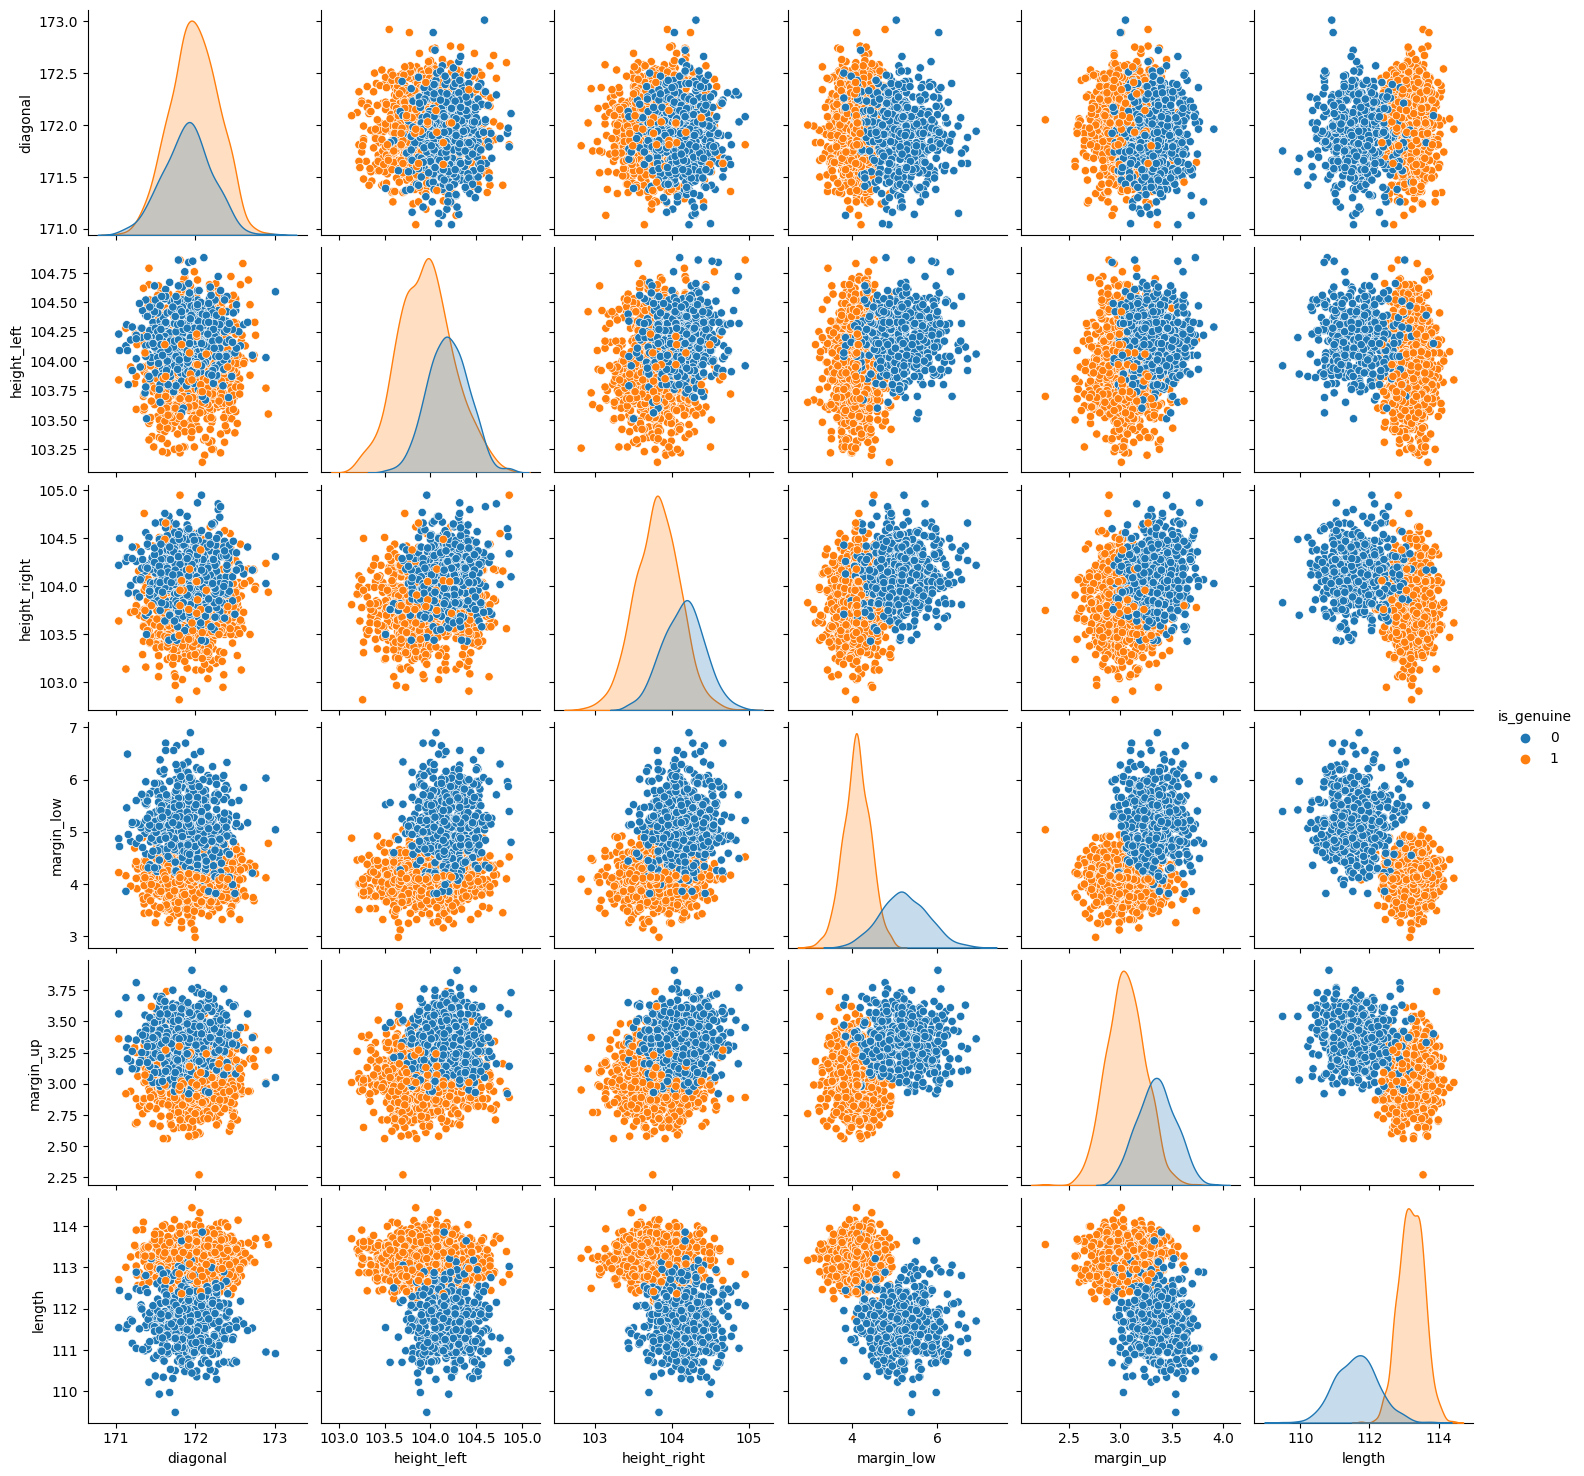

In [ ]:
#pairplot
sns.pairplot(fakebills_nona,hue='is_genuine')

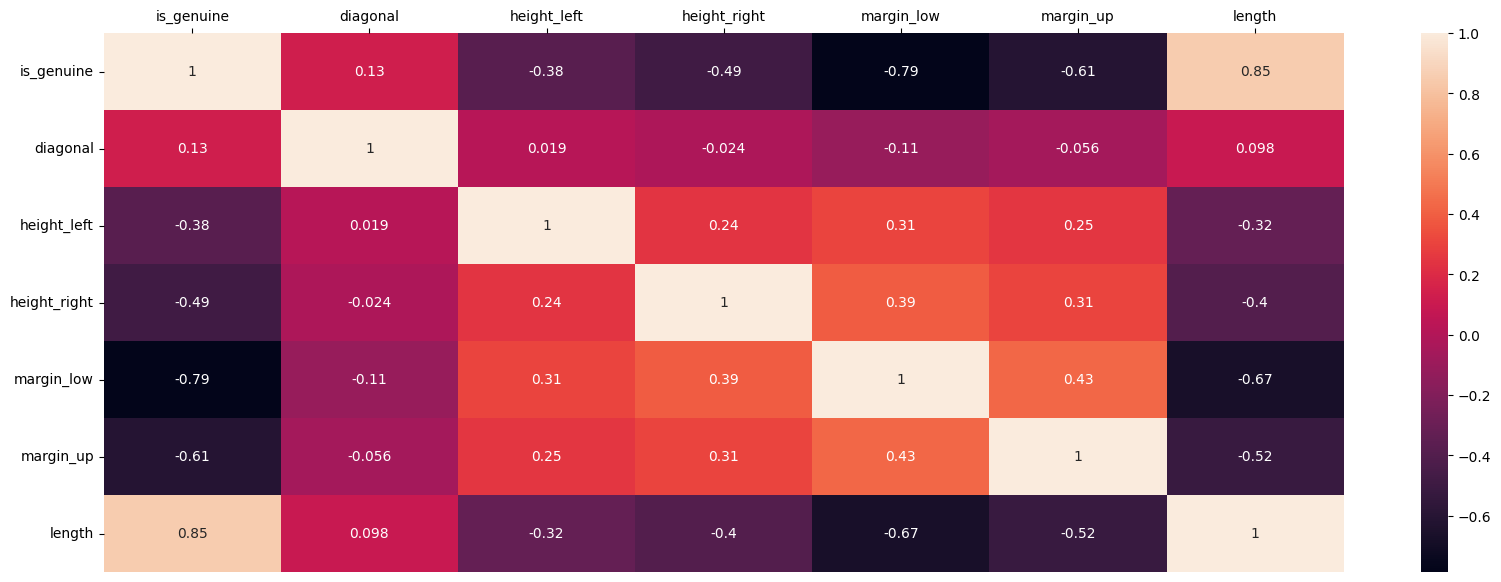

In [ ]:
#plotting the heatmap for knowing correlation
plt.figure(figsize=(20,7))
ax = sns.heatmap(fakebills_nona.corr(), annot=True)
ax.xaxis.tick_top()

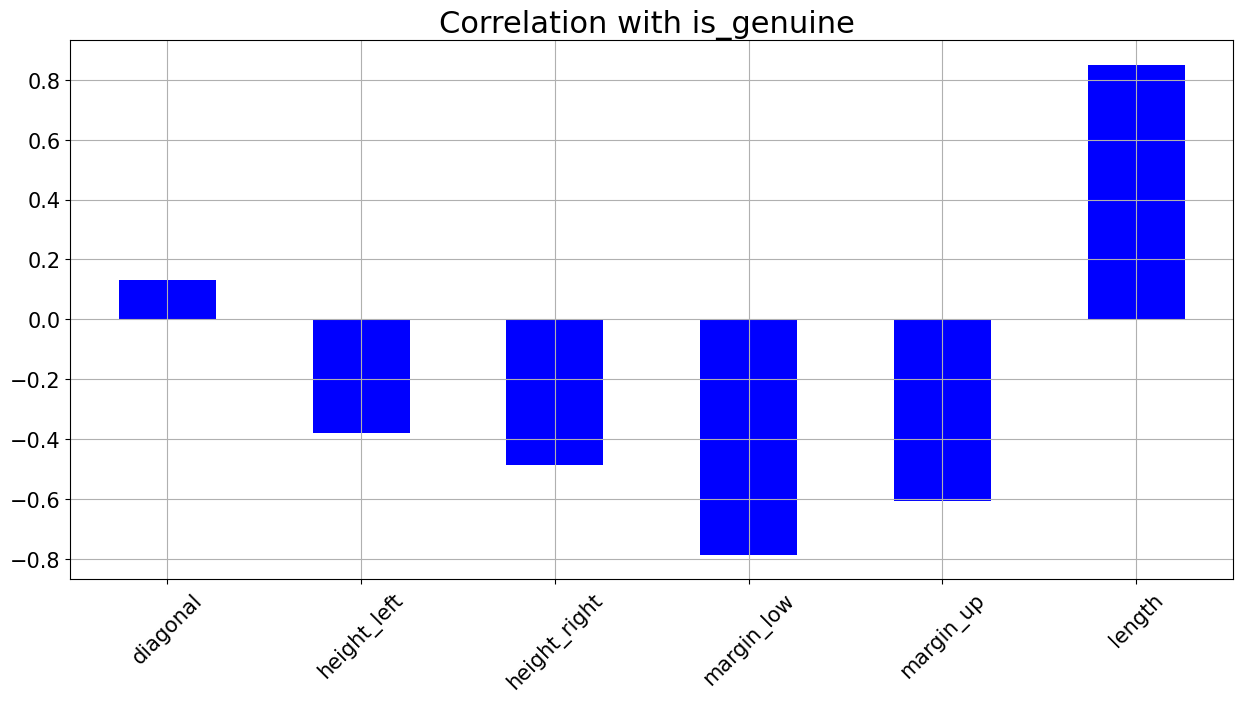

In [ ]:
#Correlation with Forest Fire Size Category
df2 = fakebills_nona.copy()

correlations = fakebills_nona.corrwith(df2.is_genuine)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(figsize= (15,7), fontsize = 15, color = 'blue', rot = 45, grid = True)
plt.title('Correlation with is_genuine ', horizontalalignment="center", fontsize = "22");

-  Among all features, length and is_genuine are highly and positively correlated, Margin_ low and is_genuine are highly and negatively correlated.

# 3) Model Building

## Splitting data for testing

In [ ]:
fakebills_nona

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.520000,2.89,112.83
1,1,171.46,103.36,103.66,3.770000,2.99,113.09
2,1,172.69,104.48,103.50,4.400000,2.94,113.16
3,1,171.36,103.91,103.94,3.620000,3.01,113.51
4,1,171.73,104.28,103.46,4.040000,3.48,112.54
...,...,...,...,...,...,...,...
1495,0,172.17,104.49,103.76,5.302069,2.93,111.21
1496,0,172.08,104.15,104.17,5.200358,3.40,112.29
1497,0,171.72,104.46,104.12,5.175468,3.61,110.31
1498,0,172.66,104.33,104.41,5.173450,3.56,111.47


In [ ]:
# dv and iv
X=fakebills_nona.drop('is_genuine',axis=1)
y=fakebills_nona['is_genuine']

X

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.520000,2.89,112.83
1,171.46,103.36,103.66,3.770000,2.99,113.09
2,172.69,104.48,103.50,4.400000,2.94,113.16
3,171.36,103.91,103.94,3.620000,3.01,113.51
4,171.73,104.28,103.46,4.040000,3.48,112.54
...,...,...,...,...,...,...
1495,172.17,104.49,103.76,5.302069,2.93,111.21
1496,172.08,104.15,104.17,5.200358,3.40,112.29
1497,171.72,104.46,104.12,5.175468,3.61,110.31
1498,172.66,104.33,104.41,5.173450,3.56,111.47


In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1495    0
1496    0
1497    0
1498    0
1499    0
Name: is_genuine, Length: 1500, dtype: int64

###SMOTE

In [ ]:
# imbalanced dataset with SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE

# summarize class distribution -- before smote
counter = Counter(y)
print('before smote',counter)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution -- after smote
counter = Counter(y)
print('after smote',counter)

before smote Counter({1: 1000, 0: 500})
after smote Counter({1: 1000, 0: 1000})


###Train & Test

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33, random_state=42)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1340, 6), (660, 6), (1340,), (660,))

## Modeling with Naive Bayes Classifier

In [ ]:
n_features, n_classes = X.shape[1], np.unique(y)

n_features, n_classes

(6, array([0, 1]))

In [ ]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.naive_bayes import CategoricalNB 
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
def report(model):
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    print('\nMoldel train Accuracy score:',np.round(accuracy_score(y_train,model.predict(X_train))*100,2),'%')
    print('\nMoldel test Accuracy score:',np.round(accuracy_score(y_test,model.predict(X_test))*100,2),'%')
    print('\n classification_report:\n',classification_report(y_test,preds))
    print('\n confusion matrix:\n')
    cmt=confusion_matrix(y_test, preds)
    fig, ax = plot_confusion_matrix(conf_mat=cmt, cmap='PiYG')
    plt.show()

### Gaussian Naive Bayes


Moldel train Accuracy score: 99.33 %

Moldel test Accuracy score: 99.24 %

 classification_report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       333
           1       0.99      1.00      0.99       327

    accuracy                           0.99       660
   macro avg       0.99      0.99      0.99       660
weighted avg       0.99      0.99      0.99       660


 confusion matrix:



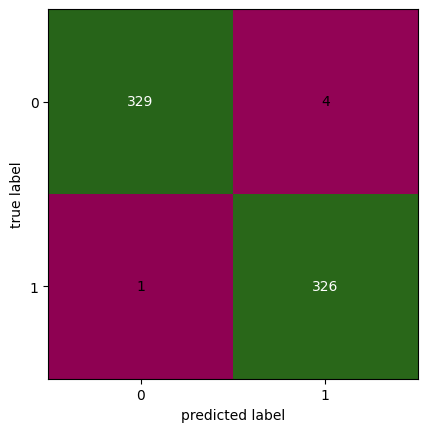

In [ ]:
#without Paremeter
model_wop_GNB=GaussianNB()
report(model_wop_GNB)

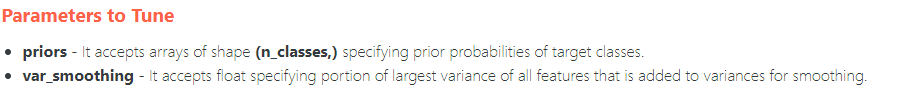

In [ ]:
params = {
            'priors': [None, [0.1,]* len(n_classes),],
            'var_smoothing': [1e-9, 1e-6, 1e-12],
         }

gaussian_nb_grid = GridSearchCV(GaussianNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
gaussian_nb_grid.fit(X_train,y_train)

print('Best Accuracy Through Grid Search : {:.3f}'.format(gaussian_nb_grid.best_score_))
print('Best Parameters : {}\n'.format(gaussian_nb_grid.best_params_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Accuracy Through Grid Search : 0.993
Best Parameters : {'priors': None, 'var_smoothing': 1e-09}




Moldel train Accuracy score: 99.33 %

Moldel test Accuracy score: 99.24 %

 classification_report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       333
           1       0.99      1.00      0.99       327

    accuracy                           0.99       660
   macro avg       0.99      0.99      0.99       660
weighted avg       0.99      0.99      0.99       660


 confusion matrix:



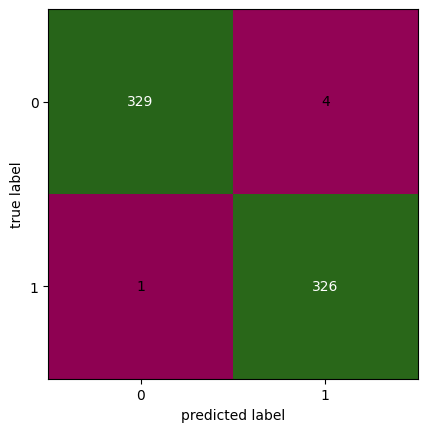

In [ ]:
#with Paremeter
model_wp_GNB=GaussianNB(priors = None, var_smoothing= 1e-09)
report(model_wp_GNB)

###Multinomial Naive Bayes


Moldel train Accuracy score: 93.13 %

Moldel test Accuracy score: 93.94 %

 classification_report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94       333
           1       0.90      0.99      0.94       327

    accuracy                           0.94       660
   macro avg       0.94      0.94      0.94       660
weighted avg       0.94      0.94      0.94       660


 confusion matrix:



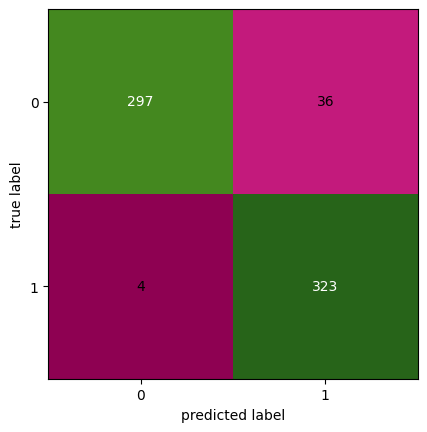

In [ ]:
#without Paremeter
model_wop_MNB=MultinomialNB()
report(model_wop_MNB)

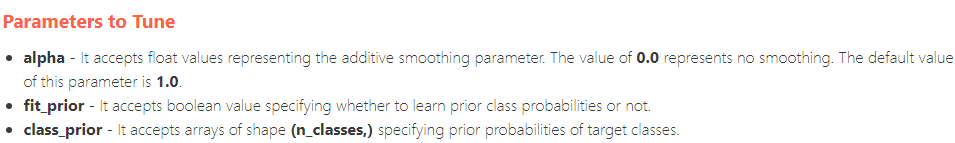

In [ ]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
          'fit_prior': [True, False],
          'class_prior': [None, [0.1,]* len(n_classes), ]
         }

multinomial_nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
multinomial_nb_grid.fit(X_train,y_train)

print('Best Accuracy Through Grid Search : {:.3f}'.format(multinomial_nb_grid.best_score_))
print('Best Parameters : {}\n'.format(multinomial_nb_grid.best_params_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Accuracy Through Grid Search : 0.935
Best Parameters : {'alpha': 10.0, 'class_prior': None, 'fit_prior': False}




Moldel train Accuracy score: 93.28 %

Moldel test Accuracy score: 94.39 %

 classification_report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94       333
           1       0.92      0.98      0.95       327

    accuracy                           0.94       660
   macro avg       0.95      0.94      0.94       660
weighted avg       0.95      0.94      0.94       660


 confusion matrix:



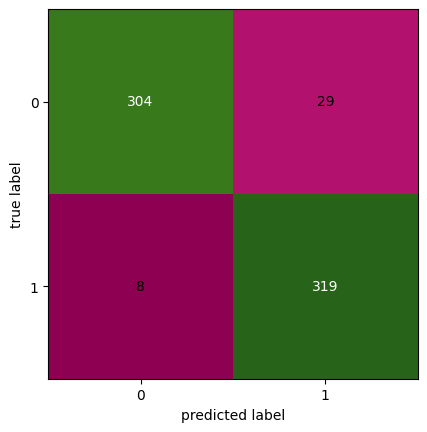

In [ ]:
#with Paremeter
model_wp_MNB=MultinomialNB(alpha= 1.0 ,class_prior= None, fit_prior= False)
report(model_wp_MNB)

### Bernoulli Naive Bayes


Moldel train Accuracy score: 50.22 %

Moldel test Accuracy score: 49.55 %

 classification_report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       333
           1       0.50      1.00      0.66       327

    accuracy                           0.50       660
   macro avg       0.25      0.50      0.33       660
weighted avg       0.25      0.50      0.33       660


 confusion matrix:



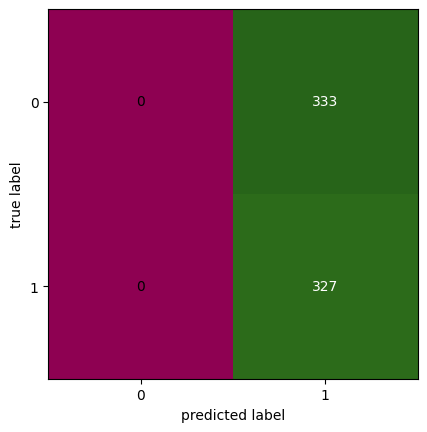

In [ ]:
#without Paremeter
model_wop_BNB=BernoulliNB()
report(model_wop_BNB)

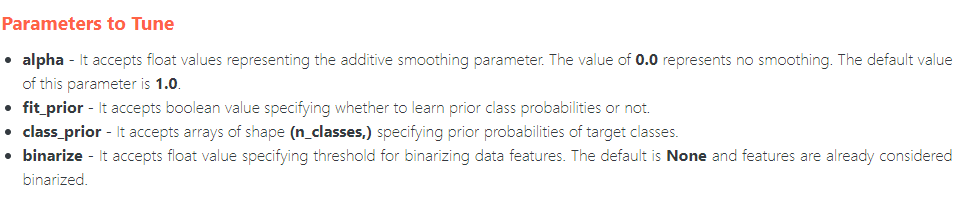

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
          'fit_prior': [True, False],
          'class_prior': [None, [0.1,]* len(n_classes), ],
          'binarize': [None, 0.0, 8.5, 10.0]
         }

bernoulli_nb_grid = GridSearchCV(BernoulliNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
bernoulli_nb_grid.fit(X_train,y_train)

print('Best Parameters : {}'.format(bernoulli_nb_grid.best_params_))
print('Best Accuracy Through Grid Search : {:.3f}\n'.format(bernoulli_nb_grid.best_score_))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Parameters : {'alpha': 0.01, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}
Best Accuracy Through Grid Search : 0.502




Moldel train Accuracy score: 50.22 %

Moldel test Accuracy score: 49.55 %

 classification_report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       333
           1       0.50      1.00      0.66       327

    accuracy                           0.50       660
   macro avg       0.25      0.50      0.33       660
weighted avg       0.25      0.50      0.33       660


 confusion matrix:



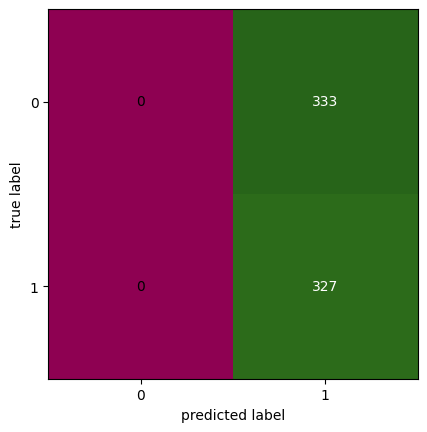

In [ ]:
#with Paremeter
model_wp_BNB=BernoulliNB(alpha= 0.01, binarize= 0.0, class_prior= None, fit_prior= True)
report(model_wp_BNB)

### Complement Naive Bayes


Moldel train Accuracy score: 93.28 %

Moldel test Accuracy score: 94.39 %

 classification_report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94       333
           1       0.92      0.98      0.95       327

    accuracy                           0.94       660
   macro avg       0.95      0.94      0.94       660
weighted avg       0.95      0.94      0.94       660


 confusion matrix:



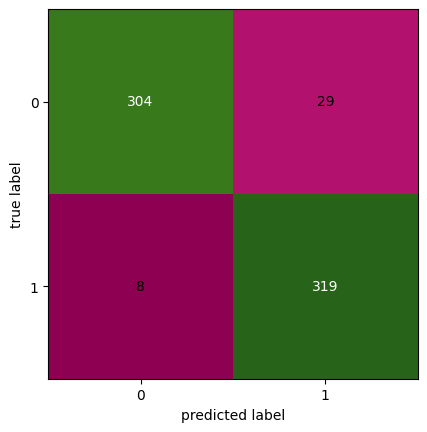

In [ ]:
#without Paremeter
model_wop_CNB=ComplementNB()
report(model_wop_CNB)

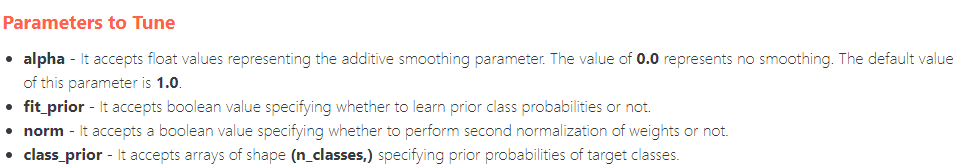

In [ ]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
          'fit_prior': [True, False],
          'norm': [True, False],
          'class_prior': [None, [0.1,]* len(n_classes), ]
         }

complement_nb_grid = GridSearchCV(ComplementNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
complement_nb_grid.fit(X_train,y_train)

print('Best Accuracy Through Grid Search : {:.3f}'.format(complement_nb_grid.best_score_))
print('Best Parameters : {}\n'.format(complement_nb_grid.best_params_))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Accuracy Through Grid Search : 0.935
Best Parameters : {'alpha': 10.0, 'class_prior': None, 'fit_prior': True, 'norm': False}




Moldel train Accuracy score: 93.28 %

Moldel test Accuracy score: 94.39 %

 classification_report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94       333
           1       0.92      0.98      0.95       327

    accuracy                           0.94       660
   macro avg       0.95      0.94      0.94       660
weighted avg       0.95      0.94      0.94       660


 confusion matrix:



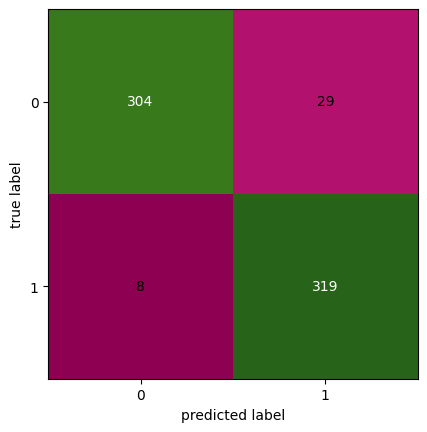

In [ ]:
#with Paremeter
model_wp_CNB=ComplementNB(alpha= 1.0, class_prior= None, fit_prior= True, norm= False)
report(model_wp_CNB)

# Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33, random_state=42)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1340, 6), (660, 6), (1340,), (660,))

Test Accuracy Score : 0.989
Train Accuracy Score : 0.999

Classification Report :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       333
           1       0.99      0.98      0.99       327

    accuracy                           0.99       660
   macro avg       0.99      0.99      0.99       660
weighted avg       0.99      0.99      0.99       660


 confusion matrix:



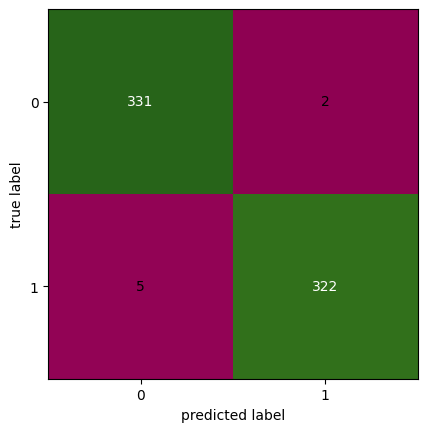

In [ ]:
#without parameter tuning
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

model_wop_Bagging=BaggingClassifier()#classifier

model_wop_Bagging.fit(X_train, y_train)
y_preds = model_wop_Bagging.predict(X_test)
y_preds_train=model_wop_Bagging.predict(X_train)
print("Test Accuracy Score : {:.3f}".format(accuracy_score(y_test, y_preds)))
print("Train Accuracy Score : {:.3f}".format(accuracy_score(y_train, y_preds_train)))
print("\nClassification Report :")
print(classification_report(y_test, y_preds))
print('\n confusion matrix:\n')
cmt=confusion_matrix(y_test, y_preds)
fig, ax = plot_confusion_matrix(conf_mat=cmt, cmap='PiYG')
plt.show()

In [ ]:
bagg = BaggingClassifier()
#Setting values for the parameters
n_estimators = [100, 300, 500]
max_samples = [5, 10, 25, 50]
max_features = [1, 2, 5]

#Creating a dictionary for the hyper parameters
hyperbag = dict(n_estimators = n_estimators, max_samples = max_samples,
              max_features = max_features)

#Applying GridSearchCV to get the best value for hyperparameters
gridbag = GridSearchCV(bagg, hyperbag, cv = 3, verbose = 1, n_jobs = -1)
bestbag = gridbag.fit(X_train, y_train)

#Printing the best hyperparameters,best score
print('The best hyper parameters are:\n',gridbag.best_params_)
print('Best Accuracy Through Grid Search : {:.3f}'.format(gridbag.best_score_))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
The best hyper parameters are:
 {'max_features': 2, 'max_samples': 25, 'n_estimators': 300}
Best Accuracy Through Grid Search : 0.990


Test Accuracy Score : 0.988
Train Accuracy Score : 0.990

Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       333
           1       0.98      1.00      0.99       327

    accuracy                           0.99       660
   macro avg       0.99      0.99      0.99       660
weighted avg       0.99      0.99      0.99       660


 confusion matrix:



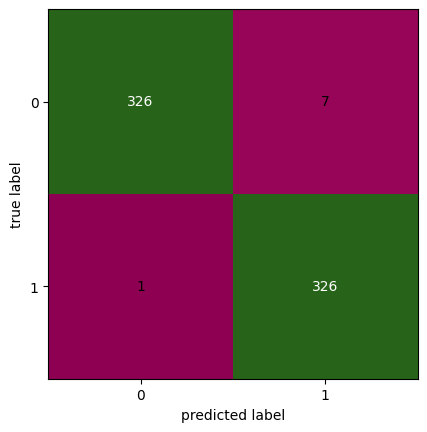

In [ ]:
#Fitting the bagging model with the best hyper parameters obtained through GridSearchCV
model_wp_Bagging = BaggingClassifier(max_features=2, max_samples=10,n_estimators= 300)
model_wp_Bagging.fit(X_train, y_train)
y_preds = model_wp_Bagging.predict(X_test)
y_preds_train=model_wp_Bagging.predict(X_train)

print("Test Accuracy Score : {:.3f}".format(accuracy_score(y_test, y_preds)))
print("Train Accuracy Score : {:.3f}".format(accuracy_score(y_train, y_preds_train)))
print("\nClassification Report :")
print(classification_report(y_test, y_preds))
print('\n confusion matrix:\n')
cmt=confusion_matrix(y_test, y_preds)
fig, ax = plot_confusion_matrix(conf_mat=cmt, cmap='PiYG')
plt.show()

#Logistic Regression


Moldel train Accuracy score: 99.03 %

Moldel test Accuracy score: 98.94 %

 classification_report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       333
           1       0.98      1.00      0.99       327

    accuracy                           0.99       660
   macro avg       0.99      0.99      0.99       660
weighted avg       0.99      0.99      0.99       660


 confusion matrix:



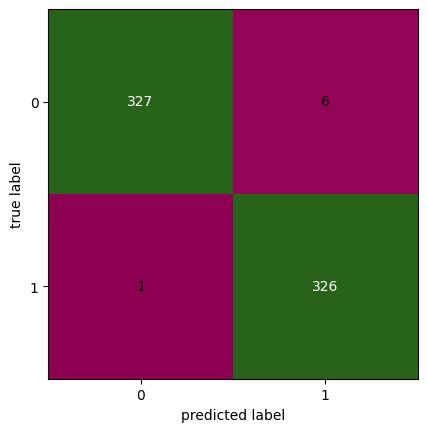

In [ ]:
from sklearn.linear_model import LogisticRegression
logModel_wop = LogisticRegression()
report(logModel_wop)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
logModel = LogisticRegression()

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 300,500]
    }
]

clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=1, n_jobs=-1)
best_clf = clf.fit(X_train,y_train)

#Printing the best hyperparameters,best score
print('The best hyper parameters are:\n',best_clf.best_params_)
print('Best Accuracy Through Grid Search : {:.3f}'.format(best_clf.best_score_))

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits
The best hyper parameters are:
 {'C': 0.615848211066026, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy Through Grid Search : 0.992



Moldel train Accuracy score: 99.25 %

Moldel test Accuracy score: 99.09 %

 classification_report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       333
           1       0.98      1.00      0.99       327

    accuracy                           0.99       660
   macro avg       0.99      0.99      0.99       660
weighted avg       0.99      0.99      0.99       660


 confusion matrix:



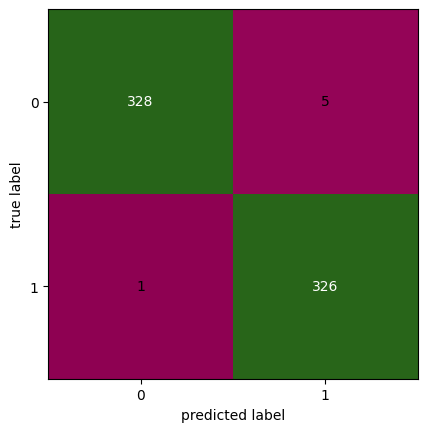

In [ ]:
logreg_wp=LogisticRegression(C= 78.47599703514607,max_iter= 500,penalty= 'l1',solver='liblinear')
report(logreg_wp)

#Decision Trees


Moldel train Accuracy score: 100.0 %

Moldel test Accuracy score: 98.18 %

 classification_report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       333
           1       0.98      0.98      0.98       327

    accuracy                           0.98       660
   macro avg       0.98      0.98      0.98       660
weighted avg       0.98      0.98      0.98       660


 confusion matrix:



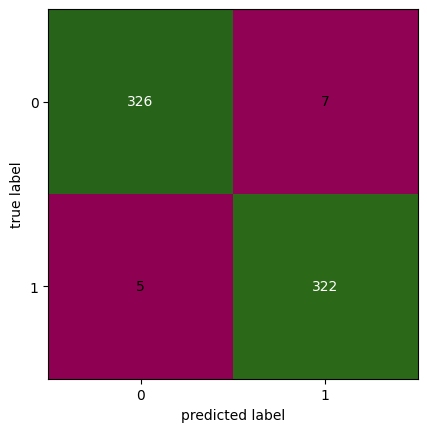

In [ ]:
decisiontree_wop=DecisionTreeClassifier()
report(decisiontree_wop)

In [ ]:
params = {'ccp_alpha':[0.1,.01,.001],"criterion":["gini", "entropy"], "max_depth":(list(range(1,10)))}

tree_clf = DecisionTreeClassifier(random_state= 42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)

best_clf = tree_cv.fit(X_train,y_train)

#Printing the best hyperparameters,best score
print('The best hyper parameters are:\n',best_clf.best_params_)
print('Best Accuracy Through Grid Search : {:.3f}'.format(best_clf.best_score_))

Fitting 3 folds for each of 54 candidates, totalling 162 fits
The best hyper parameters are:
 {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 4}
Best Accuracy Through Grid Search : 0.987



Moldel train Accuracy score: 99.55 %

Moldel test Accuracy score: 98.64 %

 classification_report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       333
           1       0.99      0.98      0.99       327

    accuracy                           0.99       660
   macro avg       0.99      0.99      0.99       660
weighted avg       0.99      0.99      0.99       660


 confusion matrix:



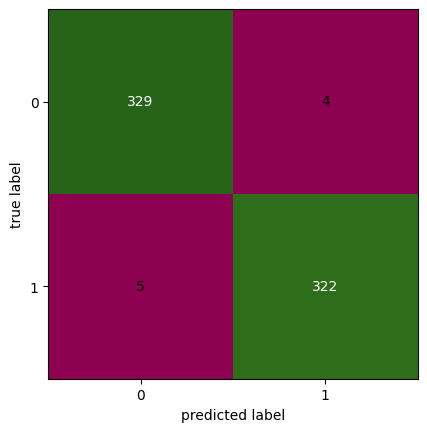

In [ ]:
decisiontree_wp=DecisionTreeClassifier(ccp_alpha= 0.001, criterion= 'gini', max_depth= 4)
report(decisiontree_wp)

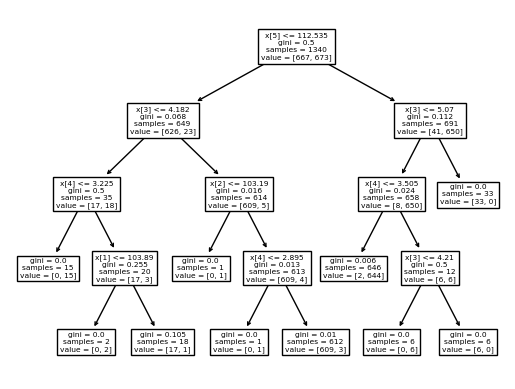

In [ ]:
# decision tree plot
from sklearn import tree
tree.plot_tree(decisiontree_wp)
plt.show()

<Figure size 2200x2000 with 0 Axes>

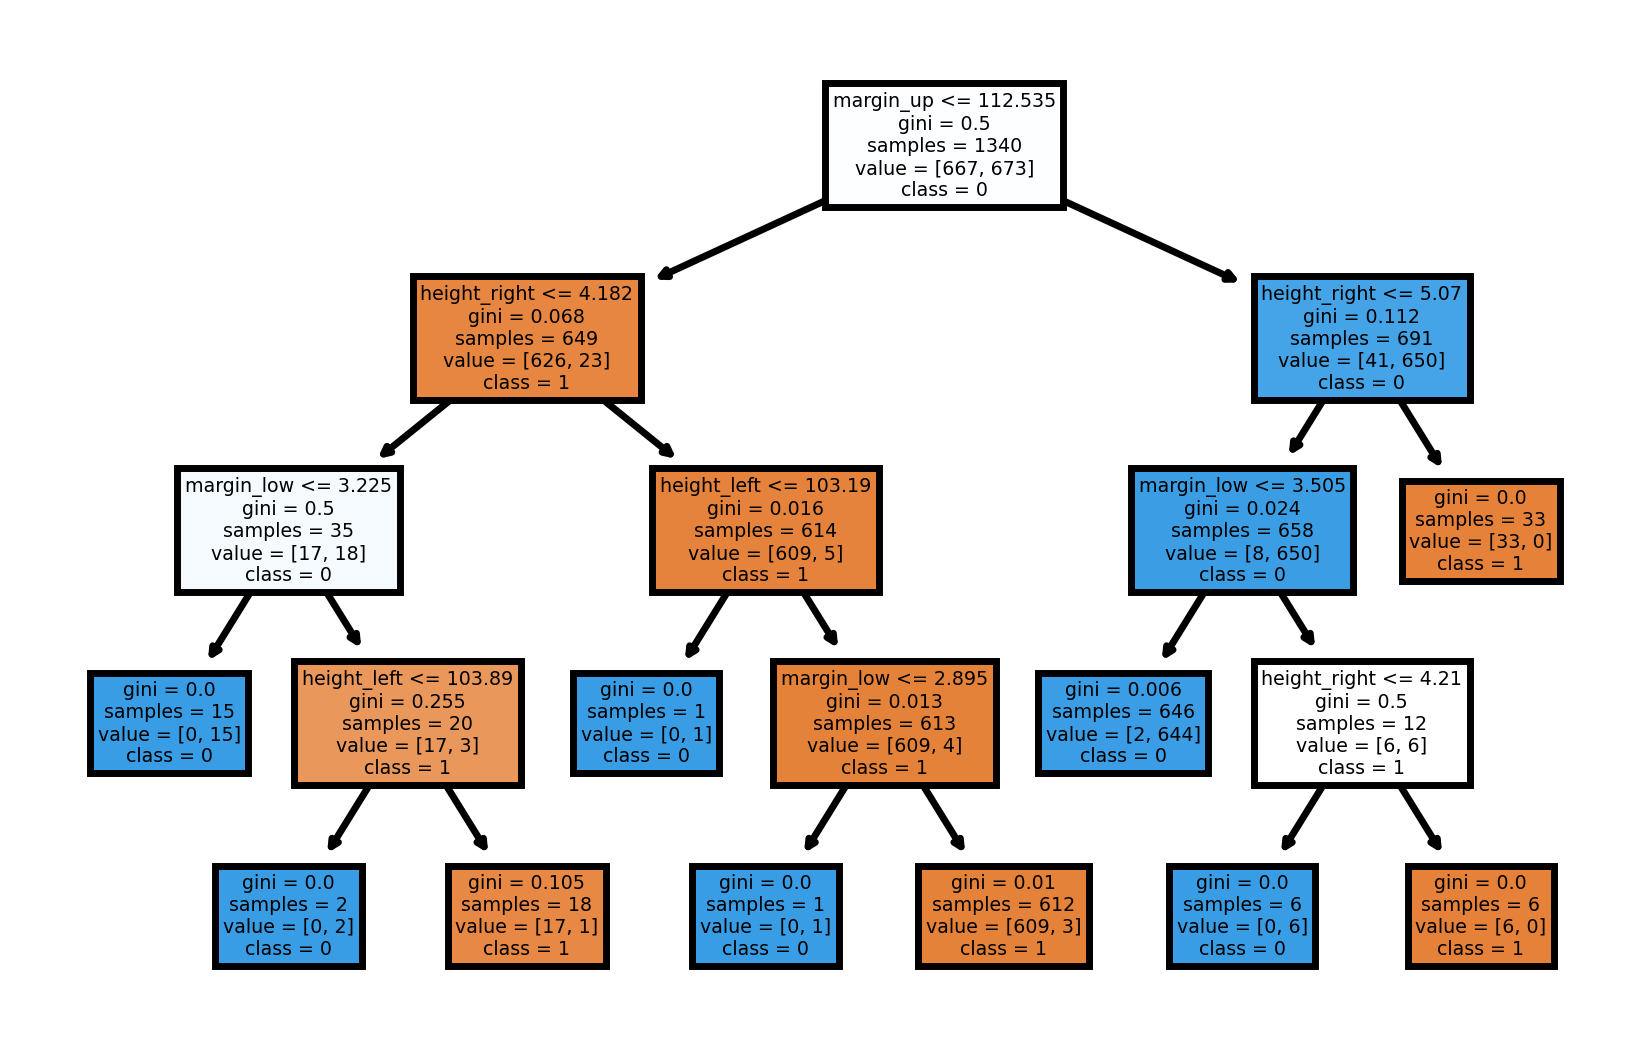

In [ ]:
from sklearn import tree
fn=['diagonal','height_left','height_left','height_right','margin_low','margin_up','length'] # .columns
cn=['1','0'] #.value_count.keys
plt.figure(figsize=(22,20))
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,2.5), dpi=500) #dpi=dotperinch
tree.plot_tree(decisiontree_wp,feature_names=fn,class_names=cn,filled=True)
plt.show()

# Random Forest Classifier


Moldel train Accuracy score: 100.0 %

Moldel test Accuracy score: 99.39 %

 classification_report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       333
           1       0.99      1.00      0.99       327

    accuracy                           0.99       660
   macro avg       0.99      0.99      0.99       660
weighted avg       0.99      0.99      0.99       660


 confusion matrix:



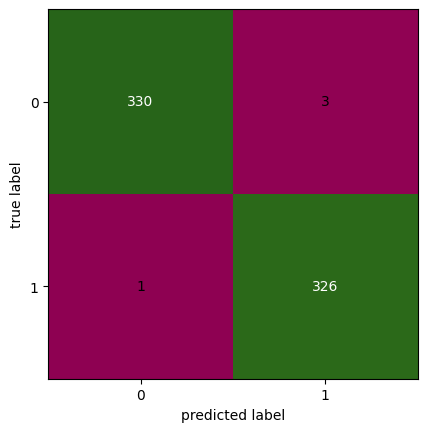

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforest_wop=RandomForestClassifier()
report(randomforest_wop)

In [ ]:
params = {'n_estimators': [100,200, 500],'max_features': ['auto', 'sqrt', 'log2'],"criterion":["gini", "entropy"], "max_depth":(list(range(1,10)))}

rf_clf = RandomForestClassifier(random_state= 42)
tree_cv = GridSearchCV(rf_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
best_clf = tree_cv.fit(X_train,y_train)

#Printing the best hyperparameters,best score
print('The best hyper parameters are:\n',best_clf.best_params_)
print('Best Accuracy Through Grid Search : {:.3f}'.format(best_clf.best_score_))

Fitting 3 folds for each of 162 candidates, totalling 486 fits
The best hyper parameters are:
 {'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'n_estimators': 100}
Best Accuracy Through Grid Search : 0.993



Moldel train Accuracy score: 99.25 %

Moldel test Accuracy score: 98.94 %

 classification_report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       333
           1       0.98      0.99      0.99       327

    accuracy                           0.99       660
   macro avg       0.99      0.99      0.99       660
weighted avg       0.99      0.99      0.99       660


 confusion matrix:



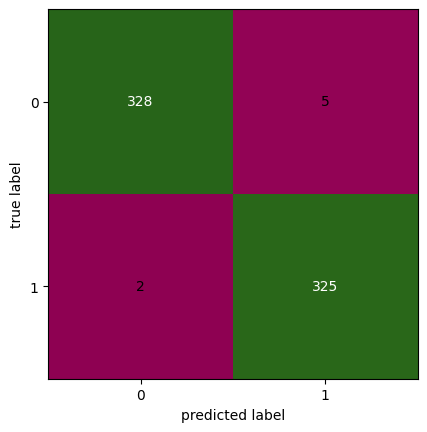

In [ ]:
randomforest_wp=RandomForestClassifier(criterion= 'gini', max_depth= 3, max_features= 'auto', n_estimators=500)
report(randomforest_wp)

## SVM


Moldel train Accuracy score: 50.22 %

Moldel test Accuracy score: 49.55 %

 classification_report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       333
           1       0.50      1.00      0.66       327

    accuracy                           0.50       660
   macro avg       0.25      0.50      0.33       660
weighted avg       0.25      0.50      0.33       660


 confusion matrix:



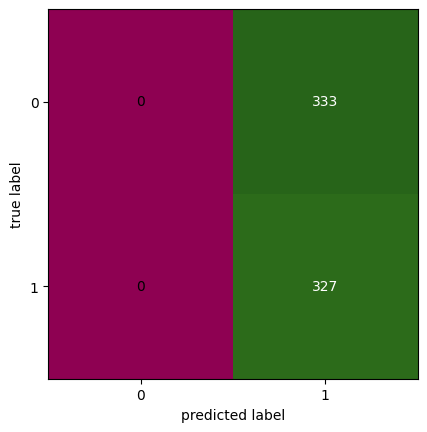

In [ ]:
from sklearn.svm import SVC
svc_wop = SVC()
report(svc_wop)

In [ ]:
from sklearn.svm import SVC
clf = SVC()
param_grid = [{'kernel':['rbf', 'sigmoid', 'poly','linear'],'gamma':[0.5,0.1,0.01],'C':[10,0.1,0.001,0.0001] }]
grid_svm = GridSearchCV(clf,param_grid,cv=10)#,verbose=480
best_clf = grid_svm.fit(X_train,y_train)

#Printing the best hyperparameters,best score
print('The best hyper parameters are:\n',best_clf.best_params_)
print('Best Accuracy Through Grid Search : {:.3f}'.format(best_clf.best_score_))

The best hyper parameters are:
 {'C': 10, 'gamma': 0.5, 'kernel': 'linear'}
Best Accuracy Through Grid Search : 0.992



Moldel train Accuracy score: 99.4 %

Moldel test Accuracy score: 99.24 %

 classification_report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       333
           1       0.98      1.00      0.99       327

    accuracy                           0.99       660
   macro avg       0.99      0.99      0.99       660
weighted avg       0.99      0.99      0.99       660


 confusion matrix:



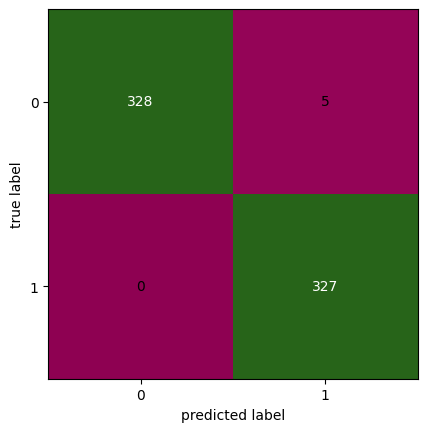

In [ ]:
svc_wp = SVC(C= 10, gamma= 0.5, kernel= 'rbf')
report(svc_wp)

#KNN


Moldel train Accuracy score: 99.25 %

Moldel test Accuracy score: 99.24 %

 classification_report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       333
           1       0.99      1.00      0.99       327

    accuracy                           0.99       660
   macro avg       0.99      0.99      0.99       660
weighted avg       0.99      0.99      0.99       660


 confusion matrix:



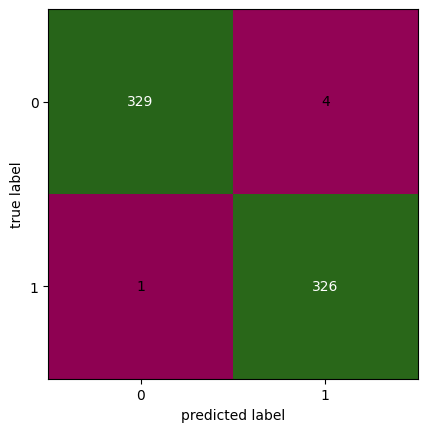

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_wop=KNeighborsClassifier()
report(knn_wop)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

param_grid = { 'n_neighbors' : [1,3,5,7,9],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
model=KNeighborsClassifier()
grid_knn=GridSearchCV(estimator=model,param_grid=param_grid,verbose = 1, cv=3, n_jobs = -1)
best_clf = grid_knn.fit(X_train,y_train)

#Printing the best hyperparameters,best score
print('The best hyper parameters are:\n',best_clf.best_params_)
print('Best Accuracy Through Grid Search : {:.3f}'.format(best_clf.best_score_))

Fitting 3 folds for each of 30 candidates, totalling 90 fits
The best hyper parameters are:
 {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}
Best Accuracy Through Grid Search : 0.991



Moldel train Accuracy score: 100.0 %

Moldel test Accuracy score: 99.55 %

 classification_report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       333
           1       0.99      1.00      1.00       327

    accuracy                           1.00       660
   macro avg       1.00      1.00      1.00       660
weighted avg       1.00      1.00      1.00       660


 confusion matrix:



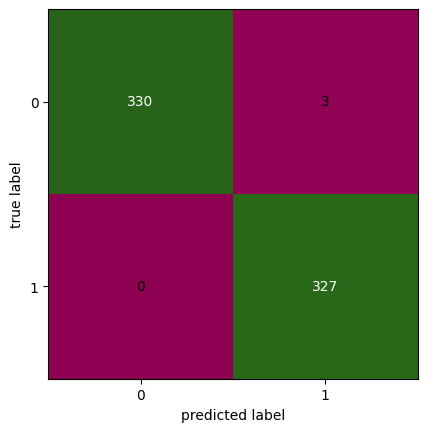

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_wp=KNeighborsClassifier(metric= 'manhattan', n_neighbors= 3, weights= 'distance')
report(knn_wp)

#Boosting Classifier


Moldel train Accuracy score: 100.0 %

Moldel test Accuracy score: 98.79 %

 classification_report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       333
           1       0.99      0.99      0.99       327

    accuracy                           0.99       660
   macro avg       0.99      0.99      0.99       660
weighted avg       0.99      0.99      0.99       660


 confusion matrix:



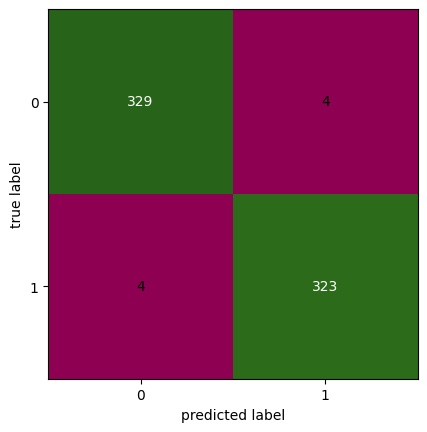

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gboost_wop=GradientBoostingClassifier()
report(gboost_wop)

In [ ]:
gbc = GradientBoostingClassifier()
param_grid = {
    "n_estimators":[10,20,50,100,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.1,1,2,3]
}

grid_gboost=GridSearchCV(estimator=gbc,param_grid=param_grid,verbose = 1, cv=5, n_jobs = -1)
best_clf = grid_gboost.fit(X_train,y_train)

#Printing the best hyperparameters,best score
print('The best hyper parameters are:\n',best_clf.best_params_)
print('Best Accuracy Through Grid Search : {:.3f}'.format(best_clf.best_score_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
The best hyper parameters are:
 {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 20}
Best Accuracy Through Grid Search : 0.993



Moldel train Accuracy score: 99.4 %

Moldel test Accuracy score: 99.09 %

 classification_report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       333
           1       0.98      1.00      0.99       327

    accuracy                           0.99       660
   macro avg       0.99      0.99      0.99       660
weighted avg       0.99      0.99      0.99       660


 confusion matrix:



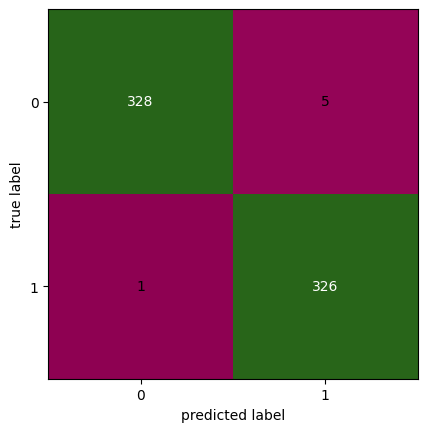

In [ ]:
gboost_wp=GradientBoostingClassifier(learning_rate= 0.1, max_depth= 1, n_estimators= 100)
report(gboost_wp)

Adaboosting


Moldel train Accuracy score: 100.0 %

Moldel test Accuracy score: 98.94 %

 classification_report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       333
           1       0.98      0.99      0.99       327

    accuracy                           0.99       660
   macro avg       0.99      0.99      0.99       660
weighted avg       0.99      0.99      0.99       660


 confusion matrix:



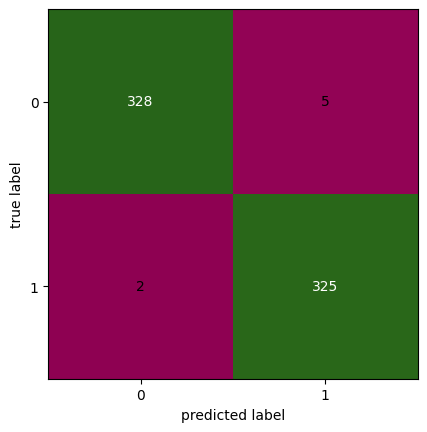

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adboost_wop=AdaBoostClassifier()
report(adboost_wop)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adboost_clf=AdaBoostClassifier()
param_grid = {
    'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
    'algorithm': ['SAMME', 'SAMME.R']
}
grid_adboost=GridSearchCV(estimator=adboost_clf,param_grid=param_grid,verbose = 1, cv=5, n_jobs = -1)
best_clf = grid_adboost.fit(X_train,y_train)

#Printing the best hyperparameters,best score
print('The best hyper parameters are:\n',best_clf.best_params_)
print('Best Accuracy Through Grid Search : {:.3f}'.format(best_clf.best_score_))

Fitting 5 folds for each of 192 candidates, totalling 960 fits



Moldel train Accuracy score: 99.7 %

Moldel test Accuracy score: 98.79 %

 classification_report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       333
           1       0.99      0.99      0.99       327

    accuracy                           0.99       660
   macro avg       0.99      0.99      0.99       660
weighted avg       0.99      0.99      0.99       660


 confusion matrix:



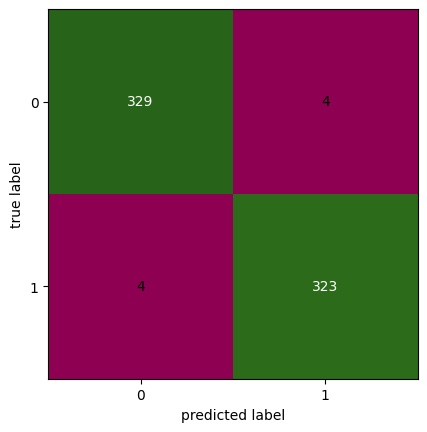

In [ ]:
adboost_wp=AdaBoostClassifier(algorithm= 'SAMME.R', learning_rate= 1.01, n_estimators= 20)
report(adboost_wp)

# 4)Conclusion about models:

In [ ]:
# comparing above models
models={'Model':pd.Series(['Guassian Naive Bayes','Multinominal Naive Bayes','Bernoulli Naive Bayes','Complement Naive Bayes','Bagging Classifier',
                           'LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','svm','KNeighborsClassifier',
                           'GradientBoostingClassifier','AdaBoostClassifier']),
     'Train score(in %) (without parameter tuning)':pd.Series([np.round(accuracy_score(y_train,model_wop_GNB.predict(X_train))*100,2),
                              np.round(accuracy_score(y_train,model_wop_MNB.predict(X_train))*100,2),
                              np.round(accuracy_score(y_train,model_wop_BNB.predict(X_train))*100,2),
                              np.round(accuracy_score(y_train,model_wop_CNB.predict(X_train))*100,2),
                              np.round(accuracy_score(y_train,model_wop_Bagging.predict(X_train))*100,2),
                              np.round(accuracy_score(y_train,logModel_wop.predict(X_train))*100,2),
                              np.round(accuracy_score(y_train,decisiontree_wop.predict(X_train))*100,2),
                              np.round(accuracy_score(y_train,randomforest_wop.predict(X_train))*100,2),
                              np.round(accuracy_score(y_train,svc_wop.predict(X_train))*100,2),
                              np.round(accuracy_score(y_train,knn_wop.predict(X_train))*100,2),
                              np.round(accuracy_score(y_train,gboost_wop.predict(X_train))*100,2),
                              np.round(accuracy_score(y_train,adboost_wop.predict(X_train))*100,2)]),
     'Test Score(in %) (without parameter tuning)':pd.Series([np.round(accuracy_score(y_test,model_wop_GNB.predict(X_test))*100,2),
                             np.round(accuracy_score(y_test,model_wop_MNB.predict(X_test))*100,2),
                             np.round(accuracy_score(y_test,model_wop_BNB.predict(X_test))*100,2),
                             np.round(accuracy_score(y_test,model_wop_CNB.predict(X_test))*100,2),
                             np.round(accuracy_score(y_test,model_wop_Bagging.predict(X_test))*100,2),
                             np.round(accuracy_score(y_test,logModel_wop.predict(X_test))*100,2),
                             np.round(accuracy_score(y_test,decisiontree_wop.predict(X_test))*100,2),
                             np.round(accuracy_score(y_test,randomforest_wop.predict(X_test))*100,2),
                             np.round(accuracy_score(y_test,svc_wop.predict(X_test))*100,2),
                             np.round(accuracy_score(y_test,knn_wop.predict(X_test))*100,2),
                             np.round(accuracy_score(y_test,gboost_wop.predict(X_test))*100,2),
                             np.round(accuracy_score(y_test,adboost_wop.predict(X_test))*100,2)]),
      'Train score(in %) (with parameter tuning)':pd.Series([np.round(accuracy_score(y_train,model_wp_GNB.predict(X_train))*100,2),
                              np.round(accuracy_score(y_train,model_wp_MNB.predict(X_train))*100,2),
                              np.round(accuracy_score(y_train,model_wp_BNB.predict(X_train))*100,2),
                              np.round(accuracy_score(y_train,model_wp_CNB.predict(X_train))*100,2),
                              np.round(accuracy_score(y_train,model_wp_Bagging.predict(X_train))*100,2),
                              np.round(accuracy_score(y_train,logreg_wp.predict(X_train))*100,2),
                              np.round(accuracy_score(y_train,decisiontree_wp.predict(X_train))*100,2),
                              np.round(accuracy_score(y_train,randomforest_wp.predict(X_train))*100,2),
                              np.round(accuracy_score(y_train,svc_wp.predict(X_train))*100,2),
                              np.round(accuracy_score(y_train,knn_wp.predict(X_train))*100,2),
                              np.round(accuracy_score(y_train,gboost_wp.predict(X_train))*100,2),
                              np.round(accuracy_score(y_train,adboost_wp.predict(X_train))*100,2)]),
     'Test Score(in %) (with parameter tuning)':pd.Series([np.round(accuracy_score(y_test,model_wp_GNB.predict(X_test))*100,2),
                             np.round(accuracy_score(y_test,model_wp_MNB.predict(X_test))*100,2),
                             np.round(accuracy_score(y_test,model_wp_BNB.predict(X_test))*100,2),
                             np.round(accuracy_score(y_test,model_wp_CNB.predict(X_test))*100,2),
                             np.round(accuracy_score(y_test,model_wp_Bagging.predict(X_test))*100,2),
                             np.round(accuracy_score(y_test,logreg_wp.predict(X_test))*100,2),
                             np.round(accuracy_score(y_test,decisiontree_wp.predict(X_test))*100,2),
                             np.round(accuracy_score(y_test,randomforest_wp.predict(X_test))*100,2),
                             np.round(accuracy_score(y_test,svc_wp.predict(X_test))*100,2),
                             np.round(accuracy_score(y_test,knn_wp.predict(X_test))*100,2),
                             np.round(accuracy_score(y_test,gboost_wp.predict(X_test))*100,2),
                             np.round(accuracy_score(y_test,adboost_wp.predict(X_test))*100,2)])}
     
models_tab=pd.DataFrame(models)
models_tab

,Model,Train score(in %) (without parameter tuning),Test Score(in %) (without parameter tuning),Train score(in %) (with parameter tuning),Test Score(in %) (with parameter tuning)
0,Guassian Naive Bayes,99.33,99.24,99.33,99.24
1,Multinominal Naive Bayes,93.13,93.94,93.28,94.39
2,Bernoulli Naive Bayes,50.22,49.55,50.22,49.55
3,Complement Naive Bayes,93.28,94.39,93.28,94.39
4,Bagging Classifier,99.85,98.94,99.03,98.79
5,LogisticRegression,99.03,98.94,99.25,99.09
6,DecisionTreeClassifier,100.00,98.18,99.55,98.64
7,RandomForestClassifier,100.00,99.39,99.25,98.94
8,svm,50.22,49.55,99.40,99.24
9,KNeighborsClassifier,99.25,99.24,100.00,99.55




*  Except for Bernoulli naive Bayes and SVM without parameters, all models are giving us with around 99% accuracy.






---

<center> THANK YOU


---


